In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
sys.path.append('/home/jvalenti/MOAD/SalishSeaTools')
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

/home/jvalenti/MOAD/SalishSeaTools/salishsea_tools/evaltools.py:49: UserWarning: Neither Python Excel module ('openpyxl','xlrd') found
  warnings.warn("Neither Python Excel module ('openpyxl','xlrd') found",UserWarning)


In [2]:
# get grid corners (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


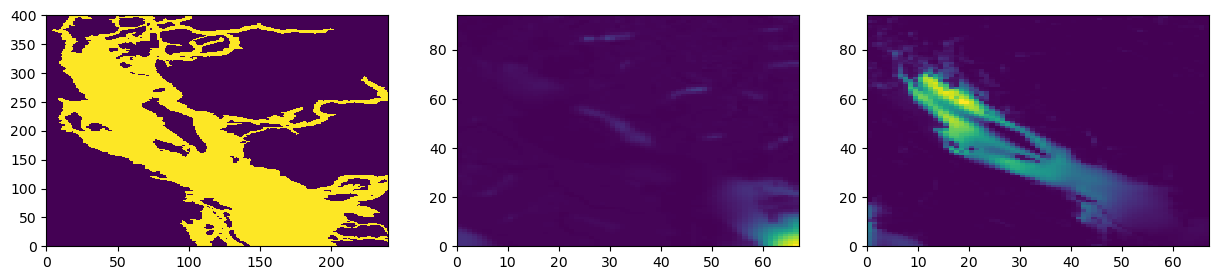

In [3]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    print(g.variables['u_wind'])

In [4]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

In [5]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

TypeError: descriptor 'item' for 'numpy.ndarray' objects doesn't apply to a 'int' object

In [ ]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(114, 121) (132, 161) (189, 96) (202, 134)


In [ ]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [ ]:
# ops: use j: 119:213, i: 96:163
# gl1: use j: 114:202, i: 96:161
# gl2: use j: 117:205, i: 99:163

<ipython-input-9-bcc7bbeb2c78>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


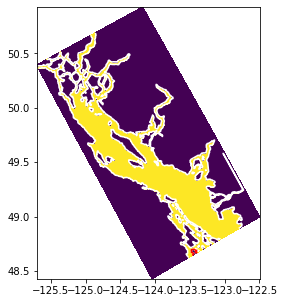

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

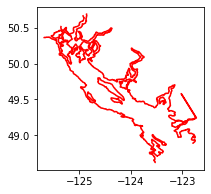

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

In [ ]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(114,202)
        ilims=(96,161)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

In [ ]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [ ]:
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [ ]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

### Check the gridlines

In [ ]:
# extract march mean wind from one of each type of file:
## ops, 2015
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(3/2)
U3opsmean=np.mean(U3ops,0)

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl1=(fu**2+fv**2)**(3/2)
U3gl1mean=np.mean(U3gl1,0)

## gl2, 2012
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(3/2)
U3gl2mean=np.mean(U3gl2,0)

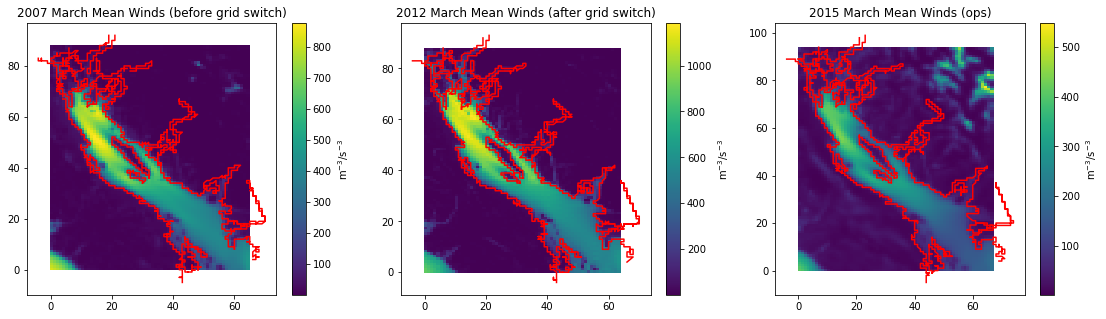

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(19,5))


iax=ax[0]
iax.set_title('2007 March Mean Winds (before grid switch)')
m=iax.pcolormesh(U3gl1mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[1]
iax.set_title('2012 March Mean Winds (after grid switch)')
m=iax.pcolormesh(U3gl2mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[2]
iax.set_title('2015 March Mean Winds (ops)')
m=iax.pcolormesh(U3opsmean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')


## 2016

In [ ]:
# extract mean wind speed cubed:

## ops, 2016 - Week 1
year=2016
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,15),dt.datetime(year,1,21),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
Week1=(fu**2+fv**2)**(3/2)
Week1mean=np.mean(Week1,0)
Week1_2016=np.nanmean(Week1mean)
## ops, 2016 - Week 2
year=2016
day=dt.datetime(year,1,8)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,8),dt.datetime(year,1,14),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
Week2=(fu**2+fv**2)**(3/2)
Week2mean=np.mean(Week2,0)

In [ ]:
Week1_2016=np.nanmean(Week1mean)
Week2_2016=np.nanmean(Week2mean)

Text(0.5, 0.98, '2016 Wind Speed')

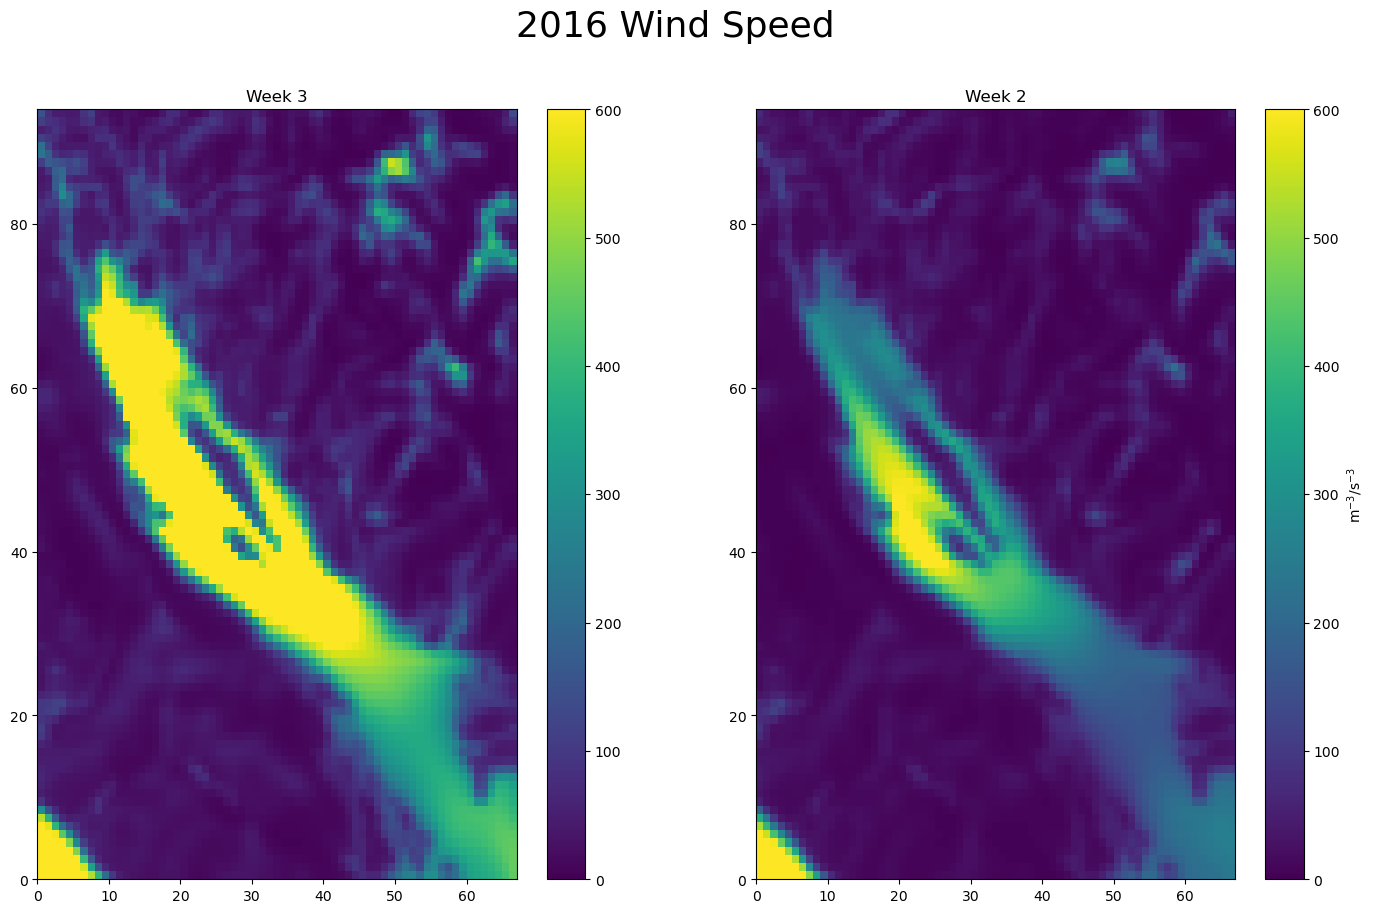

In [ ]:

fig,ax=plt.subplots(1,2,figsize=(17,10))
vmin=0
vmax=600

    
iax=ax[0]
iax.set_title('Week 3')
m=iax.pcolormesh(Week1mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1]
iax.set_title('Week 2')
m=iax.pcolormesh(Week2mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('2016 Wind Speed',fontsize=26)

No handles with labels found to put in legend.


Text(0, 0.5, 'm$^{-3}$/s$^{-3}$')

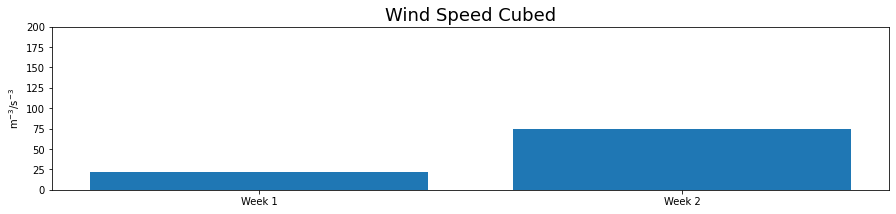

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Week 1','Week 2']
y=[Week1_2016,Week2_2016]


ax.bar(x, y,label='')


ax.set_title('Wind Speed Cubed',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,200)
ax.set_ylabel('m$^{-3}$/s$^{-3}$')